In [21]:
import os
import logging


from astropy.visualization import ZScaleInterval
from ccdproc import CCDData
import matplotlib.pyplot as plt

from goodman_pipeline.core import setup_logging


log = setup_logging(debug=True)

[02:29:25][    INFO]: Starting Goodman HTS Pipeline Log [core.setup_logging:2926]
[02:29:25][    INFO]: Local Time    : 2021-08-06 02:29:25.917523 [core.setup_logging:2927]
[02:29:25][    INFO]: Universal Time: 2021-08-06 02:29:25.918941 [core.setup_logging:2929]
[02:29:25][   DEBUG]: Starting new HTTPS connection (1): api.github.com:443 [connectionpool._new_conn:971]
[02:29:26][   DEBUG]: https://api.github.com:443 "GET /repos/soar-telescope/goodman/releases/latest HTTP/1.1" 301 165 [connectionpool._make_request:452]
[02:29:26][   DEBUG]: https://api.github.com:443 "GET /repositories/62915938/releases/latest HTTP/1.1" 200 649 [connectionpool._make_request:452]
[02:29:26][   DEBUG]: Starting new HTTPS connection (1): api.github.com:443 [connectionpool._new_conn:971]
[02:29:26][   DEBUG]: https://api.github.com:443 "GET /repos/soar-telescope/goodman/releases/latest HTTP/1.1" 301 165 [connectionpool._make_request:452]
[02:29:26][   DEBUG]: https://api.github.com:443 "GET /repositories/62

In [40]:
raw_file = 'data/0016_Calibration-Star_06-08-2021.fits'
reduced_file = 'cfzst_0348_S002_06-08-2021.fits'

raw_ccd = CCDData.read(raw_file, unit='adu')
red_ccd = CCDData.read(reduced_file, unit='adu')

[05:50:27][    INFO]: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [ccddata.fits_ccddata_reader:655]


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


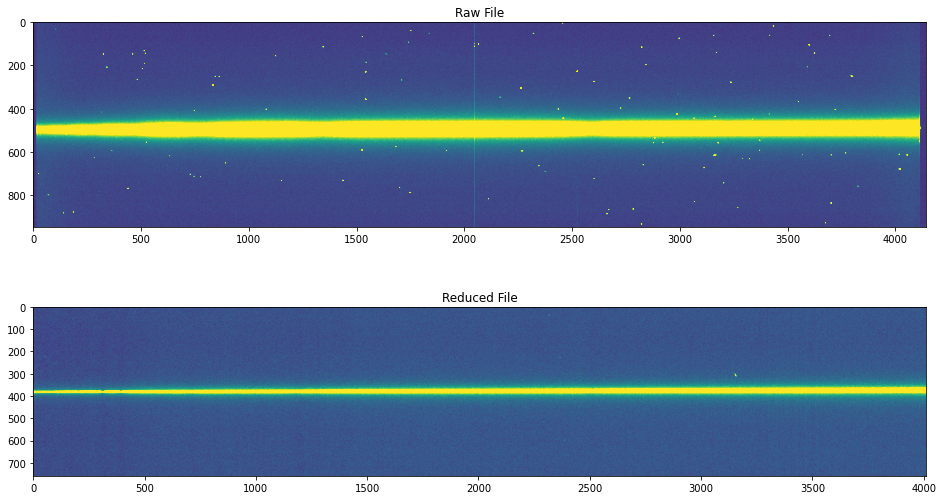

In [41]:
scale = ZScaleInterval()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.set_title("Raw File")
ax1.imshow(raw_ccd.data, clim=scale.get_limits(raw_ccd.data))
ax2.set_title("Reduced File")
ax2.imshow(red_ccd.data, clim=scale.get_limits(red_ccd.data))

In [42]:
from goodman_pipeline.core import identify_targets

target_list = identify_targets(ccd=red_ccd, fit_model='gaussian', background_threshold=1, nfind=1, plots=False)

[05:50:35][    INFO]: Searching spectroscopic targets in file: cfzst_0348_S002_06-08-2021.fits [core.__call__:4245]
[05:50:35][   DEBUG]: Slit size: 0.45 [core.__call__:4255]
[05:50:35][   DEBUG]: Serial binning: 1 [core.__call__:4257]
[05:50:35][    INFO]: Fitting Linear1D model to spatial profile to detect background shape [core.fit_background:4322]
[05:50:35][    INFO]: Subtracting background shape and level spatial profile for better target identification [core.subtract_background:4403]
[05:50:35][   DEBUG]: New background level after subtraction was found to be 7.01 [core.subtract_background:4424]
[05:50:35][    INFO]: Finding all peaks in spatial profile [core.get_peaks:4484]
[05:50:35][   DEBUG]: Found 1 peaks [core.get_peaks:4502]
[05:50:35][    INFO]: Selecting the 1 most intense peaks out of 1 found [core.filter_peaks:4569]
[05:50:35][    INFO]: Validating peaks by setting threshold 1 times the background level 13.30 [core.filter_peaks:4581]
[05:50:35][   DEBUG]: Intensity th

In [43]:
print(target_list)


[<Gaussian1D(amplitude=377.71912969, mean=376.22643497, stddev=2.32396856, name='Gaussian_375')>]


In [44]:
from goodman_pipeline.core import trace_targets
all_traces = trace_targets(ccd=red_ccd, target_list=target_list, nfwhm=2, plots=False)

[05:50:40][   DEBUG]: RMS Error of unclipped trace differences 0.367 [core.trace:3066]
[05:50:40][   DEBUG]: Re-fitting the trace for a better trace. [core.trace:3084]
[05:50:40][   DEBUG]: RMS Error after sigma-clipping trace differences 0.243 [core.trace:3097]
[05:50:40][    INFO]: Target tracing RMS error: 0.243 [core.trace:3116]
[05:50:40][   DEBUG]: Adding trace to list [core.trace_targets:3223]


In [45]:
print(all_traces)

[[<Polynomial1D(2, c0=380.35398312, c1=-0.00210638, c2=-0.00000002)>, <Gaussian1D(amplitude=377.71912969, mean=376.22643497, stddev=2.32396856, name='Gaussian_375')>, OrderedDict([('GSP_TMOD', ['Polynomial1D', 'Model name used to fit trace']), ('GSP_TORD', [2, 'Degree of the model used to fit target trace']), ('GSP_TC00', [380.3539831234194, 'Parameter c0']), ('GSP_TC01', [-0.002106377511472868, 'Parameter c1']), ('GSP_TC02', [-1.625689480247205e-08, 'Parameter c2']), ('GSP_TERR', [0.24337866214436457, 'RMS error of target trace'])])]]


In [46]:
trace1 = all_traces[0]

In [47]:
trace1
trace_model = trace1[0]

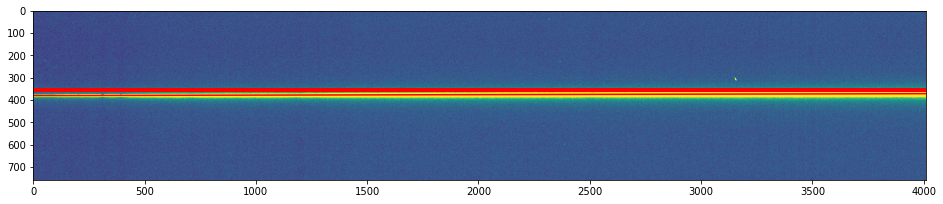

In [59]:
fig, ax = plt.subplots(figsize=(16, 16))

x, y = red_ccd.data.shape
ax.imshow(red_ccd.data, clim=scale.get_limits(red_ccd.data))
ax.plot(range(y), trace_model(range(y)), color='r')
ax.axhspan(347.52, 358.46, color='r')

[06:10:44][   DEBUG]: Adding trace information: GSP_TMOD = Polynomial1D / Model name used to fit trace [core.record_trace_information:2784]
[06:10:44][   DEBUG]: Adding trace information: GSP_TORD = 2 / Degree of the model used to fit target trace [core.record_trace_information:2784]
[06:10:44][   DEBUG]: Adding trace information: GSP_TC00 = 380.3539831234194 / Parameter c0 [core.record_trace_information:2784]
[06:10:44][   DEBUG]: Adding trace information: GSP_TC01 = -0.002106377511472868 / Parameter c1 [core.record_trace_information:2784]
[06:10:44][   DEBUG]: Adding trace information: GSP_TC02 = -1.625689480247205e-08 / Parameter c2 [core.record_trace_information:2784]
[06:10:44][   DEBUG]: Adding trace information: GSP_TERR = 0.24337866214436457 / RMS error of target trace [core.record_trace_information:2784]
[06:10:44][    INFO]: Fractional Pixel Extraction for cfzst_0348_S002_06-08-2021.fits [core.extract_fractional_pixel:1171]
[06:10:44][    INFO]: Extraction aperture in first c

[1291.09862714 1310.69151674 1267.21861605 ... 4812.60980581 4901.12813226
 4889.23965131] adu


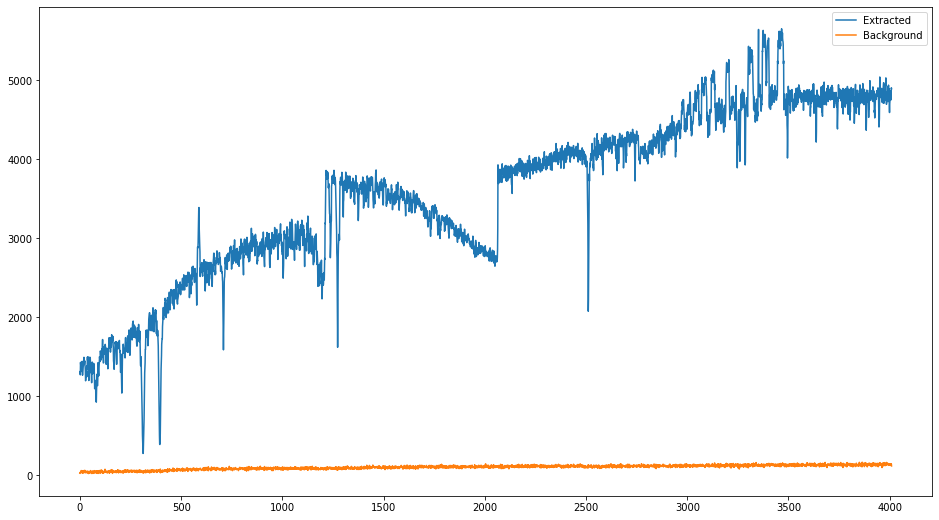

In [63]:
from goodman_pipeline.core import record_trace_information, extraction, extract_fractional_pixel
all_extracted = []

fix, ax = plt.subplots(figsize=(16,9))

single_trace, single_profile, trace_info = all_traces[0]

ccd = record_trace_information(ccd=red_ccd, trace_info=trace_info)

extracted, background, bkg_info = extract_fractional_pixel(ccd=red_ccd,
                                                           target_trace=single_trace,
                                                           target_fwhm=single_profile.fwhm, 
                                                           extraction_width=2)
print(extracted)
    
    
      
ax.plot(extracted.data, label='Extracted')

ax.plot(background, label='Background')
ax.legend(loc='best')


In [50]:
all_extracted

[[CCDData([1291.09862714, 1310.69151674, 1267.21861605, ..., 4812.60980581,
           4901.12813226, 4889.23965131], unit='adu')]]

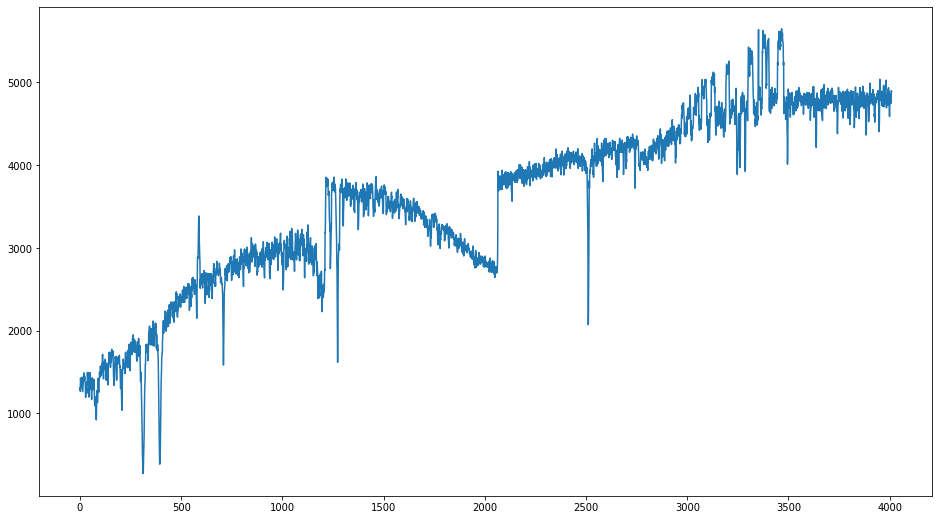

In [51]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(all_extracted[0][0].data)

# Making a simple sum

In [52]:
import numpy as np


In [53]:
new_data = np.sum(raw_ccd.data, axis=0)

print(new_data.shape)

(4142,)


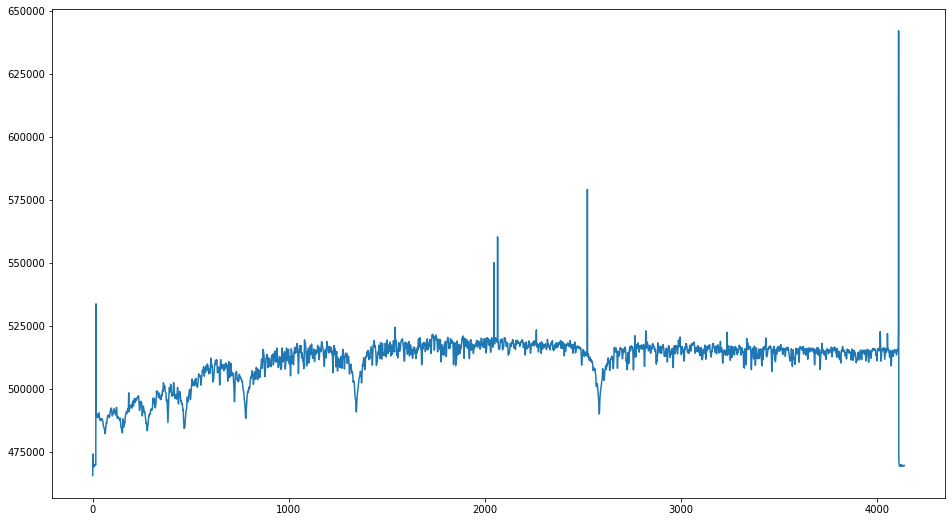

In [54]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(new_data)